In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import time
import datetime as dt
from sklearn import preprocessing, model_selection, metrics, feature_selection
from sklearn.model_selection import GridSearchCV, learning_curve
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
from sklearn import neighbors, linear_model, svm, tree, ensemble
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import silhouette_samples,silhouette_score
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_roc_curve

In [ ]:
data = pd.read_csv('ecommerce.csv',encoding="ISO-8859-1")
separator = '\n*******************************\n'
print(data.info())
print(separator)
print(data.describe())
print(separator)
print(data.head(5))
print(separator)
print(data.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB
None

*******************************

            Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
7

In [ ]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
print(data.info())
print(separator)
print(data.isnull().sum().sort_values(ascending = False))
print(separator)
print((data.isnull().sum().sort_values(ascending = False))/len(data)*100)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB
None

*******************************

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

*******************************

CustomerID     24.926694
Description     0.268

In [ ]:
print(data.shape)

(541909, 8)


In [ ]:
data.dropna(axis = 0, inplace = True)
print(data.shape)   #removing the null values

(406829, 8)


E:\Anaconda\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0, 0.5, 'Probablity Density')

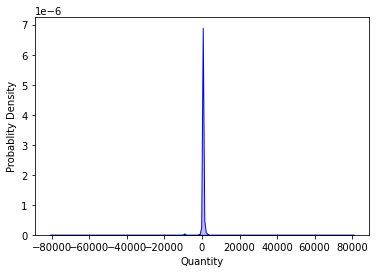

In [ ]:
x_values = data['Quantity']

sns.kdeplot(x_values, color='b', shade=True, Label='Quantity') 
  
# Setting the X and Y Label 
plt.xlabel('Quantity') 
plt.ylabel('Probablity Density')

E:\Anaconda\lib\site-packages\seaborn\distributions.py:948: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  scout = self.ax.fill_between([], [], **plot_kws)
E:\Anaconda\lib\site-packages\seaborn\distributions.py:991: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later
  artist = ax.fill_between(


Text(0, 0.5, 'Probablity Density')

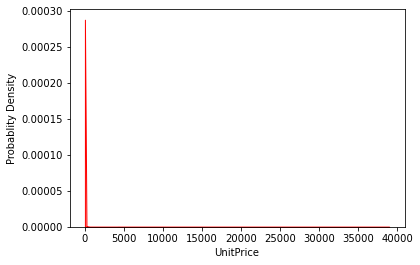

In [ ]:
x_values = data['UnitPrice']

sns.kdeplot(x_values, color='r', shade=True, Label='UnitPrice') 
  
# Setting the X and Y Label 
plt.xlabel('UnitPrice') 
plt.ylabel('Probablity Density')

In [ ]:
data = data[data['Quantity']>=0]
data = data[data['UnitPrice']>=0]

print(data.shape)

(397924, 8)


In [ ]:
data.info()
print(separator)
print(data.describe())  #data description 
data.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  float64       
 7   Country      397924 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB

*******************************

            Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.00000

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [ ]:
#Now adding a total quantity for price
data['TotalQuantity'] = data['Quantity']*data['UnitPrice']
data.head(5)

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalQuantity  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          15.30  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          22.00  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34

In [ ]:
# Now we will look at the details of the countries through which most of the orders were placed
print(data[['InvoiceNo','Country']].groupby('Country').count().sort_values("InvoiceNo",ascending = False))

                      InvoiceNo
Country                        
United Kingdom           354345
Germany                    9042
France                     8342
EIRE                       7238
Spain                      2485
Netherlands                2363
Belgium                    2031
Switzerland                1842
Portugal                   1462
Australia                  1185
Norway                     1072
Italy                       758
Channel Islands             748
Finland                     685
Cyprus                      614
Sweden                      451
Austria                     398
Denmark                     380
Poland                      330
Japan                       321
Israel                      248
Unspecified                 244
Singapore                   222
Iceland                     182
USA                         179
Canada                      151
Greece                      145
Malta                       112
United Arab Emirates         68
European

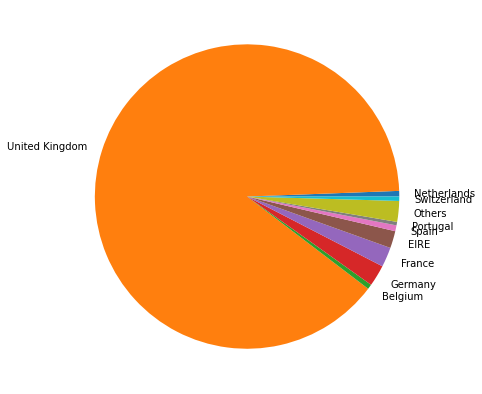

In [ ]:
#Creating a Pie Chart to Visualize the the data better
# Creating dataset 
country = ['Netherlands','United Kingdom', 'Belgium','Germany'   , 'France' , 'EIRE'  , 'Spain'    , 'Portugal'  , 'Others','Switzerland']
invoice = [2363,354345,2031,9042,8342,7238,2485 ,1462,8774,1842]
# Creating plot 
fig = plt.figure(figsize =(10, 7)) 
plt.pie(invoice, labels = country) 
  
# show plot 
plt.show() 

In [ ]:
# We see that the dataset is largely dominated by orders made from the UK.

<AxesSubplot:>

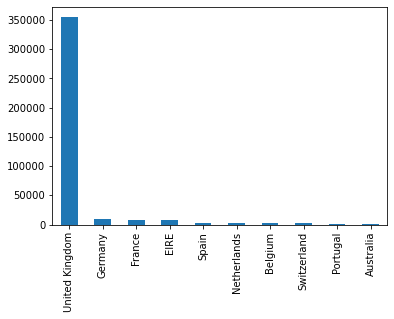

In [ ]:
'''Top 5 countries sales count wise in the cleaned up data.'''
data['Country'].value_counts().head(10).plot(kind='bar')

### Gross Amount of countries
Comparing each companies gross amount and using a bar plot to compare the data

           Country  TotalQuantity
35  United Kingdom   7.308392e+06
23     Netherlands   2.854463e+05
10            EIRE   2.655459e+05
14         Germany   2.288671e+05
13          France   2.090240e+05
0        Australia   1.385213e+05
30           Spain   6.157711e+04
AxesSubplot(0.125,0.125;0.775x0.755)


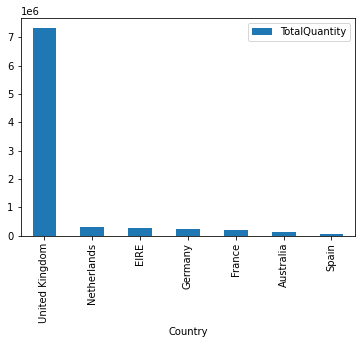

In [ ]:
'''Top 5 countries Total Gross Amount sales wise.'''
data_temp = data.groupby(['Country'])['TotalQuantity'].sum().reset_index().sort_values('TotalQuantity',ascending=False).head(7)
print(data_temp)
print(data_temp.plot(x='Country', y='TotalQuantity',kind='bar'))

### Let's find the largest amount order.

In [ ]:
data[data['TotalQuantity']==data['TotalQuantity'].max()]

InvoiceNo StockCode                  Description  Quantity  \
540421    581483     23843  PAPER CRAFT , LITTLE BIRDIE     80995   

               InvoiceDate  UnitPrice  CustomerID         Country  \
540421 2011-12-09 09:15:00       2.08     16446.0  United Kingdom   

        TotalQuantity  
540421       168469.6

### Conclusion: Since the given website is a United Kindom originated website. All the variables such as No. of Customers and the Gross total sales is dominated by the United Kingdom. The remaning portion is occupied by the neighbouring Europian Countries

#### Which description was used the most

In [ ]:
items = data['Description'].value_counts().head()
print(items)

WHITE HANGING HEART T-LIGHT HOLDER    2028
REGENCY CAKESTAND 3 TIER              1724
JUMBO BAG RED RETROSPOT               1618
ASSORTED COLOUR BIRD ORNAMENT         1408
PARTY BUNTING                         1397
Name: Description, dtype: int64


E:\Anaconda\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


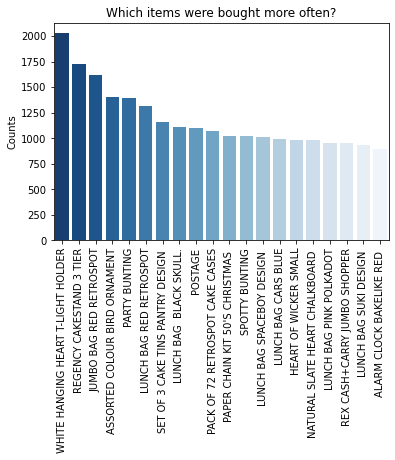

In [ ]:
item_counts = data['Description'].value_counts().sort_values(ascending=False).head(20)
sns.barplot(item_counts.index, item_counts.values,palette = "Blues_r")
plt.ylabel("Counts")
plt.title("Which items were bought more often?");
plt.xticks(rotation=90);

#### This analysis gave us a general idea of which product was most demanded by the customers and the bar plot is used for the same visulaization

In [ ]:
print(data[['InvoiceNo','Country','CustomerID','TotalQuantity']].sort_values('TotalQuantity',ascending = False).head(15))

       InvoiceNo         Country  CustomerID  TotalQuantity
540421    581483  United Kingdom     16446.0      168469.60
61619     541431  United Kingdom     12346.0       77183.60
222680    556444  United Kingdom     15098.0       38970.00
173382    551697  United Kingdom     16029.0        8142.75
348325    567423  United Kingdom     17450.0        7144.72
160546    550461  United Kingdom     15749.0        6539.40
52711     540815  United Kingdom     15749.0        6539.40
421601    573003     Netherlands     14646.0        4992.00
52709     540815  United Kingdom     15749.0        4921.50
160542    550461  United Kingdom     15749.0        4632.00
52772     540818  United Kingdom     15749.0        4522.50
244419    558526  United Kingdom     17949.0        4401.00
160544    550461  United Kingdom     15749.0        4254.50
291249    562439  United Kingdom     12931.0        4176.00
422351    573077          France     12536.0        4161.06


### RFM (Recency, Frequency, Monetary)

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent. We will create those 3 customer attributes for each customer.

### Recency

In [ ]:
data['Date'] = data['InvoiceDate'].apply(lambda x: x.date())
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  TotalQuantity  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom          15.30   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom          22.00   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom          20.34   

         Date  
0  2010-12-01  
1  2010-12-01  
2  2010-12-01  
3  2010-12-01  
4  2010-12-01

In [ ]:
#recency dataframe
recency_df = data.groupby(by='CustomerID', as_index=False)['Date'].max()
recency_df.columns = ['CustomerID','LastPurchaseDate']
recency_df.head(5)

CustomerID LastPurchaseDate
0     12346.0       2011-01-18
1     12347.0       2011-12-07
2     12348.0       2011-09-25
3     12349.0       2011-11-21
4     12350.0       2011-02-02

In [ ]:
now = dt.date(2021,12,1)
print(now)

2021-12-01


In [ ]:
recency_df['Recency'] = recency_df['LastPurchaseDate'].apply(lambda x: (now - x).days)
recency_df.drop('LastPurchaseDate',axis = 1,inplace=True)
recency_df.head(5)

CustomerID  Recency
0     12346.0     3970
1     12347.0     3647
2     12348.0     3720
3     12349.0     3663
4     12350.0     3955

###  Frequency

Frequency helps us to know how many times a customer purchased from us. To do that we need to check how many invoices are registered by the same customer.

In [ ]:
temp = data.copy()
temp.drop_duplicates(['InvoiceNo','CustomerID'],keep='first',inplace=True)
frequency_df = temp.groupby(by=['CustomerID'], as_index=False)['InvoiceNo'].count()
frequency_df.columns = ['CustomerID','Frequency']
frequency_df.head()

CustomerID  Frequency
0     12346.0          1
1     12347.0          7
2     12348.0          4
3     12349.0          1
4     12350.0          1

### Monetary

Monetary attribute answers the question: How much money did the customer spent over time?

To do that, first, we will create a new column total cost to have the total price per invoice.



In [ ]:
monetary_df = data.groupby(by = 'CustomerID',as_index=False).agg({'TotalQuantity':'sum'})
monetary_df.columns = ['CustomerID','TotalQuanity']
monetary_df.head(5)

CustomerID  TotalQuanity
0     12346.0      77183.60
1     12347.0       4310.00
2     12348.0       1797.24
3     12349.0       1757.55
4     12350.0        334.40

#### Create RFM Table

In [ ]:
rfm_df = recency_df.merge(frequency_df,on='CustomerID').merge(monetary_df,on='CustomerID')
rfm_df.set_index('CustomerID',inplace=True)
rfm_df.head(5)

Recency  Frequency  TotalQuanity
CustomerID                                  
12346.0        3970          1      77183.60
12347.0        3647          7       4310.00
12348.0        3720          4       1797.24
12349.0        3663          1       1757.55
12350.0        3955          1        334.40

In [ ]:
features = rfm_df.columns
rfm_df.shape

(4339, 3)

### RFM Table Visualisation

Now we will look at the correlation between the the Recency, Frequency and Monetary part of the RFM table which will be an integral part of customer segmentation

               Recency  Frequency  TotalQuanity
Recency       1.000000  -0.260459     -0.122190
Frequency    -0.260459   1.000000      0.554094
TotalQuanity -0.122190   0.554094      1.000000


<AxesSubplot:>

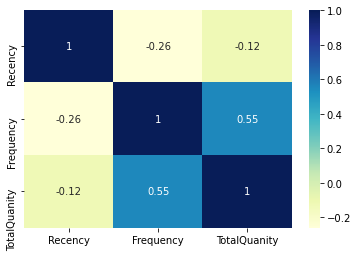

In [ ]:
print(rfm_df.corr())
sns.heatmap(rfm_df.corr(),cmap="YlGnBu",annot=True)

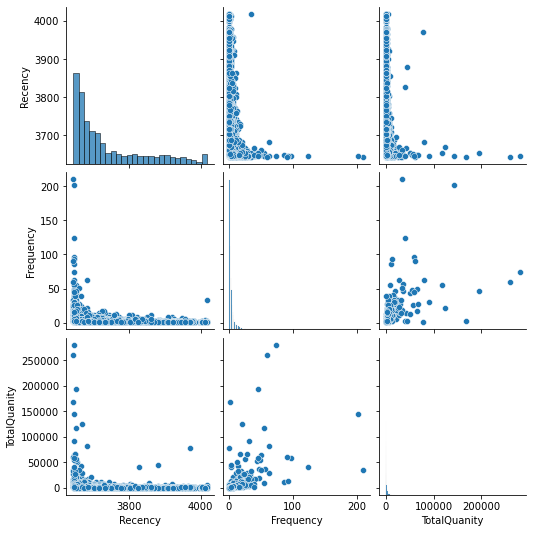

In [ ]:
sns.pairplot(rfm_df, diag_kind="hist")

In [ ]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
rfm_df = pd.DataFrame(pt.fit_transform(rfm_df))
rfm_df.columns = features
rfm_df.head()

E:\Anaconda\lib\site-packages\sklearn\preprocessing\_data.py:2995: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


Recency  Frequency  TotalQuanity
0      0.0  -1.158092      3.193082
1      0.0   1.202204      1.377477
2      0.0   0.661012      0.745038
3      0.0  -1.158092      0.728345
4      0.0  -1.158092     -0.592290

### Conclusion

To gain even further insight into customer behavior, we can dig deeper in the relationship between RFM variables.

RFM model can be used in conjunction with certain predictive models like K-means clustering, Logistic Regression and Recommendation Engines to produce better informative results on customer behavior.

We will go for K-means since it has been widely used for Market Segmentation and it offers the advantage of being simple to implement.

## PCA

Applying PCA to reduce the the dimensions and the correlation between Frequency and Monetary features.

In [ ]:
sc = StandardScaler()
rfm_scaled = sc.fit_transform(rfm_df)
rfm_scaled[:5]

array([[ 0.        , -1.15809198,  3.19308246],
       [ 0.        ,  1.20220365,  1.37747719],
       [ 0.        ,  0.66101158,  0.74503797],
       [ 0.        , -1.15809198,  0.72834536],
       [ 0.        , -1.15809198, -0.59228971]])

In [ ]:
from sklearn.decomposition import PCA
pca = PCA()
pca_tranformed_data = pca.fit_transform(rfm_scaled)

In [ ]:
pca.components_

array([[-0.        , -0.70710678, -0.70710678],
       [ 0.        ,  0.70710678, -0.70710678],
       [ 1.        ,  0.        ,  0.        ]])

In [ ]:
pca.explained_variance_

array([1.7869312 , 0.21352984, 0.        ])

In [ ]:
var_exp = pca.explained_variance_ratio_
var_exp

array([0.89325969, 0.10674031, 0.        ])

In [ ]:
np.cumsum(var_exp)

array([0.89325969, 1.        , 1.        ])

In [ ]:
pca.mean_

array([ 0.00000000e+00, -4.91271769e-17, -3.27514513e-17])

In [ ]:
pca.n_features_

3

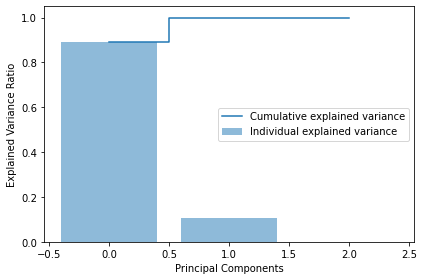

In [ ]:
plt.figure(figsize=(6,4))
plt.bar(range(3), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.step(range(3), np.cumsum(var_exp), where='mid', label='Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
X = rfm_df.copy()
pca = PCA(n_components = 2)
df_pca = pca.fit_transform(X)

df_pca = pd.DataFrame(df_pca)
df_pca.head(5)

0         1
0 -1.438956 -3.076745
1 -1.824110 -0.123937
2 -0.994227 -0.059416
3  0.303877 -1.333913
4  1.237707 -0.400083

#### K-Means Clustering

In [ ]:
X = df_pca.copy()

In [ ]:
from sklearn.cluster import KMeans 

cluster_range = range(1, 15)
cluster_errors = []
cluster_sil_scores = []

for num in cluster_range: 
    clusters = KMeans(num, n_init = 100,init='k-means++',random_state=0)
    clusters.fit(X)
    labels = clusters.labels_                     # capture the cluster lables
    centroids = clusters.cluster_centers_         # capture the centroids
    cluster_errors.append( clusters.inertia_ )    # capture the intertia
clusters_df = pd.DataFrame({ "num_clusters":cluster_range, "cluster_errors": cluster_errors} )
clusters_df[0:10]

num_clusters  cluster_errors
0             1     8678.000000
1             2     3167.420932
2             3     2006.394310
3             4     1574.267720
4             5     1182.796121
5             6     1001.412936
6             7      858.982994
7             8      750.809404
8             9      666.654981
9            10      582.980374

Text(0, 0.5, 'error')

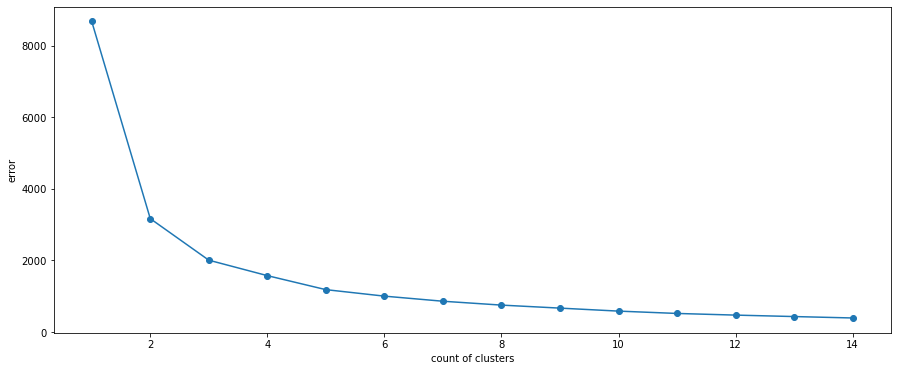

In [ ]:
plt.figure(figsize=(15,6))
plt.plot(clusters_df["num_clusters"],clusters_df["cluster_errors"],marker = 'o')
plt.xlabel('count of clusters')
plt.ylabel('error')

In [ ]:
for num in range(2,16):
    clusters = KMeans(n_clusters=num,random_state=0)
    labels = clusters.fit_predict(df_pca)
    
    sil_avg = silhouette_score(df_pca, labels)
    print('For',num,'The Silhouette Score is =',sil_avg)

For 2 The Silhouette Score is = 0.5316107630818497
For 3 The Silhouette Score is = 0.4694030012531909
For 4 The Silhouette Score is = 0.44942890966243004
For 5 The Silhouette Score is = 0.4362454293012626
For 6 The Silhouette Score is = 0.42863197113981266
For 7 The Silhouette Score is = 0.43620511006132334
For 8 The Silhouette Score is = 0.43894620122124783
For 9 The Silhouette Score is = 0.42130205823726435
For 10 The Silhouette Score is = 0.4381857233402833
For 11 The Silhouette Score is = 0.4449402387696798
For 12 The Silhouette Score is = 0.43964473190543546
For 13 The Silhouette Score is = 0.4444446432525774
For 14 The Silhouette Score is = 0.44206887628030744
For 15 The Silhouette Score is = 0.43846338997850404


### Inferences: 

We observe from the elbow plot a sharp bend after the number of clusters increase by 2. Silhoutte Score is also the highest for 2 clusters.

But, there is also a significant reduce in cluster error as number of clusters increase from 2 to 4 and after 4, the reduction is not much.

So, we will choose n_clusters = 4 to properly segment our customers.

In [ ]:
kmeans = KMeans(n_clusters = 4)
kmeans = kmeans.fit(df_pca)
labels = kmeans.predict(df_pca)
centroids = kmeans.cluster_centers_

print(labels)
print()
print('Cluster Centers')
print(centroids)

[0 0 0 ... 1 0 3]

Cluster Centers
[[-1.70745845  0.04812617]
 [ 1.71818482  0.26826144]
 [ 1.05686094 -0.58092844]
 [-0.13227033  0.11820651]]


In [ ]:
df_pca['Clusters'] = labels
df_pca.head()

0         1  Clusters
0 -1.438956 -3.076745         0
1 -1.824110 -0.123937         0
2 -0.994227 -0.059416         0
3  0.303877 -1.333913         2
4  1.237707 -0.400083         2

In [ ]:
df_pca['Clusters'].value_counts()

3    1555
0    1184
1     804
2     796
Name: Clusters, dtype: int64

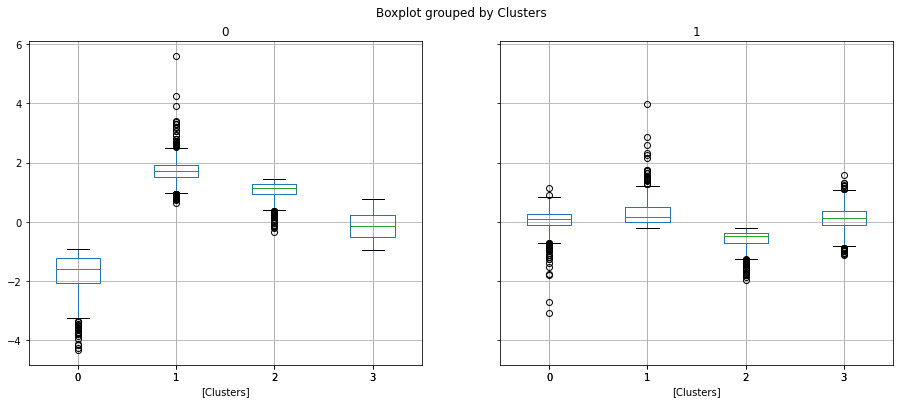

In [ ]:
df_pca.boxplot(by = 'Clusters',figsize=(15,6))
plt.show()

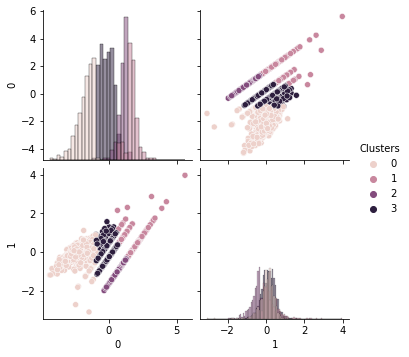

In [ ]:
sns.pairplot(df_pca,diag_kind='hist',hue='Clusters')

In [ ]:
df_pca.head(5)

0         1  Clusters
0 -1.438956 -3.076745         0
1 -1.824110 -0.123937         0
2 -0.994227 -0.059416         0
3  0.303877 -1.333913         2
4  1.237707 -0.400083         2

In [ ]:
X = df_pca[[0,1]]
Y = df_pca['Clusters']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
lr = LogisticRegression(max_iter=1000,random_state=0)
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
print('Test accuracy = ', accuracy_score(y_test, y_pred))

Test accuracy =  0.9900153609831029


In [ ]:
knn = KNeighborsClassifier(n_neighbors = 4) 
  
knn.fit(X_train, y_train) 
pred = knn.predict(X_test) 
  
# Predictions and Evaluations 
# Let's evaluate our KNN model !  
from sklearn.metrics import classification_report, confusion_matrix 
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 

[[354   0   0   1]
 [  0 240   0   1]
 [  0   0 239   0]
 [  3   0   0 464]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       355
           1       1.00      1.00      1.00       241
           2       1.00      1.00      1.00       239
           3       1.00      0.99      0.99       467

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



In [ ]:
from sklearn.tree import DecisionTreeRegressor
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42, stratify=Y)
regressor = DecisionTreeRegressor(random_state = 213)
regressor.fit(X_train,y_train)

pred = regressor.predict(X_test) 
print(confusion_matrix(y_test, pred)) 
  
print(classification_report(y_test, pred)) 

[[355   0   0   0]
 [  0 239   0   2]
 [  0   0 239   0]
 [  1   0   0 466]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       355
           1       1.00      0.99      1.00       241
           2       1.00      1.00      1.00       239
           3       1.00      1.00      1.00       467

    accuracy                           1.00      1302
   macro avg       1.00      1.00      1.00      1302
weighted avg       1.00      1.00      1.00      1302



###  Conclusion

We saw that using classification models like Logisitc Regression, KNeighborsClassifier ,DecisionTree we predicted the clusters for customers using RFM dataset as independent variables and Cluster as the target variable. The clusters predicted by the classification models perfectly aligns with K-Means clustering. So, we can conclude that our clusters are correct.